In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
# Assuming the dataset is in a CSV file
Raw_data = pd.read_csv('fifa_players.csv')

Clean_data = Raw_data.drop(["name","full_name","weak_foot(1-5)","overall_rating","skill_moves(1-5)","birth_date","age","height_cm","weight_kgs","nationality","potential","value_euro","wage_euro","international_reputation(1-5)","national_team_position","preferred_foot","body_type","release_clause_euro","national_team","national_rating","national_jersey_number"], axis=1) #Deleting raw data


# Remove goalkeepers from the dataset
Clean_data = Clean_data[~Clean_data['positions'].str.contains('GK', na=False)]

# Display the Clean_data DataFrame
Clean_data.to_csv('clean_fifa_players.csv', index=False)

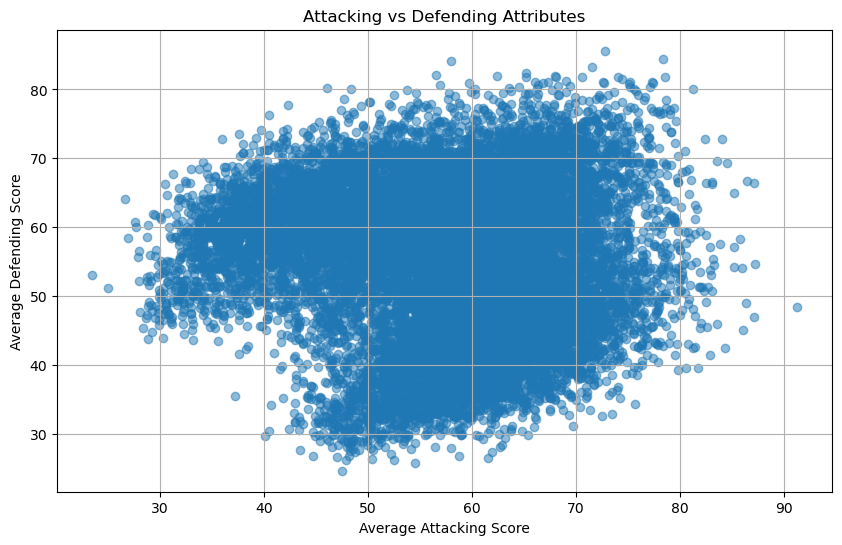

In [ ]:
import matplotlib.pyplot as plt

# Define attacking and defending attributes
attacking_attributes = ['crossing', 'finishing', 'short_passing', 'volleys', 'dribbling', 'curve', 'long_passing', 'ball_control', 'sprint_speed', 'agility', 'shot_power', 'long_shots', 'vision']
defending_attributes = ['heading_accuracy', 'strength', 'aggression', 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle', 'positioning']

# Calculate average attacking and defending scores for each player
Clean_data['attacking_score'] = Clean_data[attacking_attributes].mean(axis=1)
Clean_data['defending_score'] = Clean_data[defending_attributes].mean(axis=1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(Clean_data['attacking_score'], Clean_data['defending_score'], alpha=0.5)
plt.title('Attacking vs Defending Attributes')
plt.xlabel('Average Attacking Score')
plt.ylabel('Average Defending Score')
plt.grid(True)
plt.show()

In [ ]:
cntDiag = Clean_data["attacking_score"].value_counts()
propDiag = Clean_data["defending_score"].value_counts(normalize=True)
cntDiag

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the target variable: 1 for attacking, 0 for defending
Clean_data['player_type'] = (Clean_data['attacking_score'] > Clean_data['defending_score']).astype(int)

# Prepare features and target
X = Clean_data[['attacking_score', 'defending_score']]
y = Clean_data['player_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision boundary (optional)
import numpy as np

plt.figure(figsize=(10, 6))
x_min, x_max = X['attacking_score'].min() - 1, X['attacking_score'].max() + 1
y_min, y_max = X['defending_score'].min() - 1, X['defending_score'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X['attacking_score'], X['defending_score'], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title('k-NN Decision Boundary')
plt.xlabel('Average Attacking Score')
plt.ylabel('Average Defending Score')
plt.grid(True)
plt.show()

KeyError: 'attacking_score'

In [19]:
from pandas.plotting import scatter_matrix

fig = scatter_matrix(Raw_data, alpha=0.2, figsize=(6, 6), diagonal="hist")
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

C:\Users\markh\AppData\Local\Temp\ipykernel_13956\3355468108.py:8: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


KeyboardInterrupt: 

In [ ]:
The dataset provided contains information about FIFA players, including their attributes, positions, and other details. Here's how the code in the Jupyter Notebook works with this dataset:

1. **Data Cleaning**:
    - The `Raw_data` DataFrame is loaded from a CSV file containing the original dataset.
    - Irrelevant columns (e.g., player names, birth dates, etc.) are dropped to create the `Clean_data` DataFrame.
    - Goalkeepers (players with "GK" in their positions) are removed from `Clean_data` since their attributes differ significantly from outfield players.

2. **Feature Engineering**:
    - Two new columns, `attacking_score` and `defending_score`, are created in `Clean_data`. These are calculated as the average of specific attributes:
      - `attacking_score`: Based on attributes like crossing, finishing, dribbling, etc.
      - `defending_score`: Based on attributes like marking, standing tackle, interceptions, etc.

3. **Visualization**:
    - A scatter plot is created to visualize the relationship between `attacking_score` and `defending_score` for all players. This helps identify trends or clusters in the data.

4. **Classification**:
    - A new target variable, `player_type`, is defined:
      - `1` for players with higher `attacking_score` than `defending_score`.
      - `0` otherwise.
    - Features (`attacking_score` and `defending_score`) and the target (`player_type`) are used to train a k-Nearest Neighbors (k-NN) classifier.
    - The dataset is split into training and testing sets, and the k-NN model is trained on the training set.
    - Predictions are made on the test set, and the model's performance is evaluated using accuracy and a classification report.

5. **Decision Boundary Visualization**:
    - The decision boundary of the k-NN classifier is visualized using a contour plot. This shows how the model classifies players based on their `attacking_score` and `defending_score`.

6. **Scatter Matrix**:
    - A scatter matrix is created for the `Raw_data` DataFrame to visualize pairwise relationships between numerical attributes. This helps in understanding correlations and distributions.

### Summary:
The notebook processes the FIFA dataset to classify players as either attacking or defending types based on their attributes. It uses data cleaning, feature engineering, visualization, and machine learning (k-NN) to achieve this. The visualizations and model evaluation provide insights into the dataset and the classifier's performance.